# A9 Customer Segmentation

**Rationale** The idea for this assignment is to give you hands on experience in applying behavioral segmentation techniques to real world data where the variables you use for segmentation are not already created for you (you must define them first). Thus you must first do "feature engineering" before you can do segmentation. Don't worry, this problem is broken down into components.

The dataset we use is [retail invoice](https://drive.google.com/drive/folders/1IUq9xm_0jWEs41iFp8TSWpb0CbPiT87m?usp=sharing) level data where 1 row = 1 SKU purchased on one occcasion. The data is organized into by Invoice X StockCode level. Each invoice is one purchase occassion, and for each invoice we have several observations representing the items purchased on that occassion.

The goal of the first part is to create useful features about each consumer's observed behaviors, i.e. go from transaction level to customer level data. The goal of the second part is to then do segmentation based on these newly constructed features. 

# Part 1 Feature Engineering (5 points)

Generally, feature engineering is where your marketing domain knowledge comes into play. In other words, your intuitions about what matters in terms of separating consumers into different groups should drive what features to engineer. However, in this assignment, you are expected to compute the following characteristics.

## Read in data
Make the following selection of rows.
```
df = df[(df.CustomerID.notnull())&(df.Quantity>0)&(df.UnitPrice>0)&(df.StockCode.apply(lambda x: x[0] in '0123456789'))]
```

1. What are the selection criteria based on the code above?
    **CustomerIDs that are not null, Quantities greater than zero, UnitPrices greater than zero, and StockCodes**

## Unique count variables

Create a dataframe, `df_u` that represents each consumer's total number of transactions and unique products purchased.

Hint: use a `groupby` + `.nunique()` statement. `df.groupby('id')['x'].nunique().reset_index()` will find the number of unique values of column 'x' for each "id". You should calculate the number of unique `StockCode`'s (like SKU's) and `InvoicesNo`'s for each `CustomerID`. Change your column names in the resulting dataframe, `df_u`, to `['CustomerID', 'NTrans', 'NProducts']`.


## Customer spend

Compute the total customer spending for each customer of this retailer. 

Hint
1. Create a column for `TotalSpend` (unit price x quantity)
1. Use a (groupby + sum) to create a dataframe `df_s` that contains each customer's sum of `TotalSpend`.

## Compute price of average SKU purchased

Create a dataframe `df_p` using groupby + mean combination to get average price of the items for each customer. Rename the columns `['CustomerID', 'AvgPrice']`.

## Merge `df_u`, `df_s`, and `df_p` (2 merges), call new dataframe df_c (c for "consumer")

Using the variables in `df_c`, compute the following additional columns:
1. Average spend per transaction (call it "SpendPerTrans")
1. Average SKUs per transaction (unique products/transaction, call it "SKUsPerTrans")


In total, you should have `df_c` with columns `['CustomerID', 'NTrans', 'NProducts', 'TotalSpend', 'AveragePrice', 'SpendPerTrans', 'SKUsPerTrans']`

# Create standaradized version of df_c

1. Create `df_c_std` that has all the columns of `df_c` except `CustomerID`.
1. Write a loop through all the columns of `df_c_std` to standardize each column (compute the z-score by subtracting mean and dividing by standard deviation).


In [23]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [24]:
fpath = '/content/drive/MyDrive/MKTG 3509 - CUSTOMER DATA ANALYTICS/Assignment 9/'
os.listdir(fpath)

['A9 + Carly Bernhart.ipynb', 'online_invoices.csv', 'online_invoices.gsheet']

In [32]:
df = pd.read_csv(fpath + 'online_invoices.csv', sep = ',') #reading in the csv file
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [74]:
df_u=df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index() #Creating dataframe df_u which represents each consumer's total number of transactions and unique products purchased

In [75]:
df_u

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [61]:
df1 = df.groupby('CustomerID')['StockCode'].nunique().reset_index() #creating another dataframe to include StockCode

In [77]:
df_u=df_u.merge(df1)
df_u.rename(columns={'InvoiceNo':'NTrans', 'StockCode': 'NProducts'}, inplace=True) #renaming the columns

In [78]:
df_u

,CustomerID,NTrans,NProducts
0,12346.0,2,1
1,12347.0,7,103
2,12348.0,4,22
3,12349.0,1,73
4,12350.0,1,17
...,...,...,...
4367,18280.0,1,10
4368,18281.0,1,7
4369,18282.0,3,12
4370,18283.0,16,263


In [79]:
df['TotalSpend']=df['Quantity'] * df['UnitPrice'] #creating the TotalSpend column
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [80]:
df_s=df.groupby('CustomerID')['TotalSpend'].sum().reset_index() #creating dataframe df_s which contains each customer's sum of TotalSpend
df_s

,CustomerID,TotalSpend
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [81]:
df_p = df.groupby('CustomerID')['UnitPrice'].mean().reset_index() # cretaing dataframe df_p using groupby + mean combination to get average price of the items for each customer
df_p.rename(columns={'UnitPrice':'AvgPrice'}, inplace=True) #renaming the columns
df_p

,CustomerID,AvgPrice
0,12346.0,1.040000
1,12347.0,2.644011
2,12348.0,5.764839
3,12349.0,8.289041
4,12350.0,3.841176
...,...,...
4367,18280.0,4.765000
4368,18281.0,5.622857
4369,18282.0,4.821538
4370,18283.0,1.614987


In [67]:
df2=df_u.merge(df_s) #creating dataframe df2 to aid in the merging of df_u, df_s, and df_p
df2

,CustomerID,NTrans,NProducts,TotalSpend
0,12346.0,2,1,0.00
1,12347.0,7,103,4310.00
2,12348.0,4,22,1797.24
3,12349.0,1,73,1757.55
4,12350.0,1,17,334.40
...,...,...,...,...
4367,18280.0,1,10,180.60
4368,18281.0,1,7,80.82
4369,18282.0,3,12,176.60
4370,18283.0,16,263,2094.88


In [68]:
df_c = df2.merge(df_p) #officially creating df_c (which merges df_u, df_s, and df_p)
df_c.head()

,CustomerID,NTrans,NProducts,TotalSpend,AvgPrice
0,12346.0,2,1,0.00,1.040000
1,12347.0,7,103,4310.00,2.644011
2,12348.0,4,22,1797.24,5.764839
3,12349.0,1,73,1757.55,8.289041
4,12350.0,1,17,334.40,3.841176


In [82]:
df_c['SpendPerTrans']=df_c['TotalSpend']/df_c['NTrans'] #creating SpendPerTrans column
df_c['SKUsPerTrans']=df_c['NProducts']/df_c['NTrans'] #creating SKUsPerTrans column
df_c

,CustomerID,NTrans,NProducts,TotalSpend,AvgPrice,SpendPerTrans,SKUsPerTrans
0,12346.0,2,1,0.00,1.040000,0.000000,0.500000
1,12347.0,7,103,4310.00,2.644011,615.714286,14.714286
2,12348.0,4,22,1797.24,5.764839,449.310000,5.500000
3,12349.0,1,73,1757.55,8.289041,1757.550000,73.000000
4,12350.0,1,17,334.40,3.841176,334.400000,17.000000
...,...,...,...,...,...,...,...
4367,18280.0,1,10,180.60,4.765000,180.600000,10.000000
4368,18281.0,1,7,80.82,5.622857,80.820000,7.000000
4369,18282.0,3,12,176.60,4.821538,58.866667,4.000000
4370,18283.0,16,263,2094.88,1.614987,130.930000,16.437500


In [84]:
df_c_std=df_c.drop(['CustomerID'], axis=1) #creating  df_c_std which has all the columns of df_c except CustomerID

In [85]:
df_c_std.head()

,NTrans,NProducts,TotalSpend,AvgPrice,SpendPerTrans,SKUsPerTrans
0,2,1,0.00,1.040000,0.000000,0.500000
1,7,103,4310.00,2.644011,615.714286,14.714286
2,4,22,1797.24,5.764839,449.310000,5.500000
3,1,73,1757.55,8.289041,1757.550000,73.000000
4,1,17,334.40,3.841176,334.400000,17.000000


In [87]:
for c in ['TotalSpend', 'AvgPrice', 'SpendPerTrans', 'SKUsPerTrans']:  #standardizing each column and computing the z-score by subtracting mean and dividing by standard deviation
    df_c_std[c + '_z'] = (df_c_std[c] - df_c_std[c].mean())/df_c_std[c].std(ddof=0)

In [88]:
df_c_std.head() 

,NTrans,NProducts,TotalSpend,AvgPrice,SpendPerTrans,SKUsPerTrans,TotalSpend_z,AvgPrice_z,SpendPerTrans_z,SKUsPerTrans_z
0,2,1,0.00,1.040000,0.000000,0.500000,-0.231001,-0.047870,-0.874548,-1.007164
1,7,103,4310.00,2.644011,615.714286,14.714286,0.293432,-0.036804,0.830106,-0.120312
2,4,22,1797.24,5.764839,449.310000,5.500000,-0.012316,-0.015273,0.369402,-0.695206
3,1,73,1757.55,8.289041,1757.550000,73.000000,-0.017146,0.002142,3.991369,3.516227
4,1,17,334.40,3.841176,334.400000,17.000000,-0.190312,-0.028544,0.051265,0.022297


# Part 2 Segmentation (6 points)

## Dimensionality reduction

1. Compute the 2D principal components transformation of `df_c_std`, call this `transformed`
1. Make sure `transformed` is a dataframe, then name the columns 'p0' and 'p1' for principal component 0 and 1, respectively.
1. Add `p0` and `p1` to the df_c dataframe (create the same 2 columns in df_c).

Create a scatter plot of the principal components 0 vs 1. 

## Segmentation
Using a loop, compute the k-means clustering for $k$ from 2 to 15 segments using the `transformed` dataframe. Store the segment as the column `'seg2'`,`'seg3'`,...,`'seg15'` in the `df_c` dataframe. Make sure you store the inertia metrics in a list called `elbowdata` like in the notes. Create the elbow plot for your k-means clustering. 

1. How many segments does there appear to be based on the elbow plot?
1. Use a loop to plot p0 vs p1 for each segment (different color for each segment)
1. Use a groupby statement to show the mean and std dev of the variables in the raw versions (not z-scores) used to conduct the segmentation. e.g. what are the averages and std. devs of `['NTrans', 'NProducts', 'TotalSpend', 'AveragePrice', 'SpendPerTrans', 'SKUsPerTrans']`

1. In a few sentences, describe what are the characteristics of the resulting segments. Any distinctive segments?

**Hints**
1. Note here that `s` should be the number of clusters at each iteration of your loop, e.g. `for s in ....` 
2. `df_c['seg{}'.format(s)]=` your k-means segmentation to create the `'seg2'`, ..., `'seg15'` columns.

## HDBSCAN (bonus 1 point)
Now do the segmentation using hdbscan instead of k-means. Remember, you have to install hdbscan first.

Use minimum cluster size = 10. 

1. Use a loop to plot p0 vs p1 for each HDBSCAN segment that is not the uncategorized data points (hdbscan label is not -1, i.e. >-1).
1. For the raw variables of `['NTrans', 'NProducts', 'TotalSpend', 'AveragePrice', 'SpendPerTrans', 'SKUsPerTrans']`, compute the means by segment. Sort on TotalSpend from highest to lowest.
1. In a few sentences, describe what are the characteristics of the resulting segments. Any distinctive segments?







In [90]:
from sklearn.decomposition import PCA #reducing the dimension to 2D using PCA  #Taken directly from segmentation notes
pca = PCA(n_components=2) #finding first 2 components
transformed = pca.fit_transform(np.array(df_c_std)) 
transformed = pd.DataFrame(transformed) #creating dataframe from transformed numpy array
transformed.columns = ['p{}'.format(c) for c in range(transformed.shape[1])] #looping through number of components and renaming to p0, p1, etc.
for c in transformed.columns: 
    df_c_std[c] = transformed[c] #adding p0 and p1 to the df_c dataframe
transformed

,p0,p1
0,-1904.214893,-280.308957
1,2416.830019,255.117147
2,-98.901806,134.755585
3,-114.187537,1442.335766
4,-1563.626720,47.430659
...,...,...
4367,-1720.271963,-103.421823
4368,-1821.891439,-201.268978
4369,-1726.511500,-224.938661
4370,193.837346,-186.885002


Text(0, 0.5, 'P1')

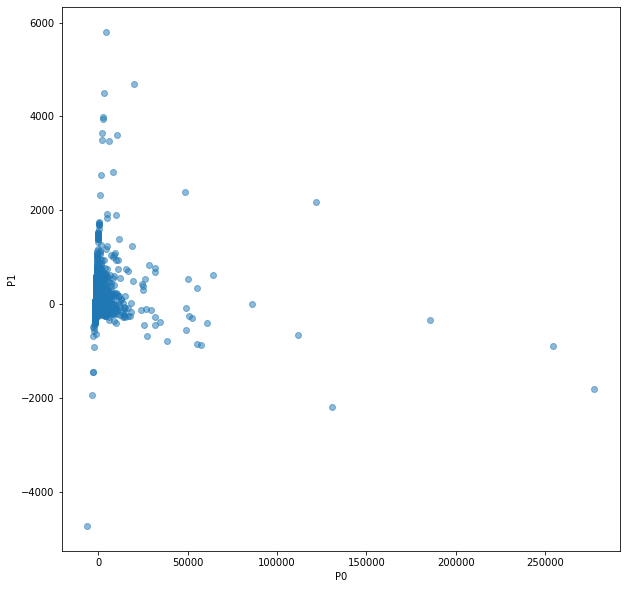

In [93]:
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
ax.scatter(df_c_std.p0, df_c_std.p1, alpha = .5, cmap = 'RdYlGn')
ax.set_xlabel('P0')
ax.set_ylabel('P1')

In [94]:
elbowdata = list() # empty list to store segment, inertia pairs
for k in range(2, 51): # from 2 to 50 segments, inclusive 
    clusterer = KMeans(n_clusters=k) # Do kmeans
    d['seg_{}'.format(k)] = clusterer.fit_predict(transformed) # store cluster segment
    inertia = clusterer.inertia_ # within sum variances is aka inertia
    elbowdata.append([k, inertia]) # append to elbowdata
elbowdata = pd.DataFrame(elbowdata, columns = ['k', 'inertia']) # make dataframe from elbowinertia

NameError: ignored